# 1. Frame the Problem

1. Define the objective in business terms.  
2. How will your solution be used?  
3. What are the current solutions/workarounds (if any)?  
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)  
5. How should performance be measured?  
6. Is the performance measure aligned with the business objective?  
7. What would be the minimum performance needed to reach the business objective?  
8. What are comparable problems? Can you reuse experience or tools?  
9. Is human expertise available?  
10. How would you solve the problem manually?  
11. List the assumptions you or others have made so far.  
12. Verify assumptions if possible.  

This is a learning exercise in carrying through the entire process of a Machine Learning question. The plan is to use data from https://www.openml.org/d/1471, this is the data set from https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#.  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

The features correspond to 14 EEG measurements from the headset, originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order.



# 2. Get the Data
Note: automate as much as possible so you can easily get fresh data.  

1. List the data you need and how much you need.  
2. Find and document where you can get that data.  
3. Check how much space it will take.  
4. Check legal obligations, and get the authorization if necessary.  
5. Get access authorizations.  
6. Create a workspace (with enough storage space).  
7. Get the data.  
8. Convert the data to a format you can easily manipulate (without changing the data itself).  
9. Ensure sensitive information is deleted or protected (e.g., anonymized). 
10. Check the size and type of data (time series, sample, geographical, etc.).  
11. Sample a test set, put it aside, and never look at it (no data snooping!).  

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
from sklearn.datasets import fetch_openml

data = fetch_openml("eeg-eye-state")

In [10]:
print(data)
feature_names = data['feature_names']
X = data['data']
y = data['target']

{'data': array([[4329.23, 4009.23, 4289.23, ..., 4280.51, 4635.9 , 4393.85],
       [4324.62, 4004.62, 4293.85, ..., 4279.49, 4632.82, 4384.1 ],
       [4327.69, 4006.67, 4295.38, ..., 4282.05, 4628.72, 4389.23],
       ...,
       [4277.44, 3990.77, 4246.67, ..., 4257.95, 4591.79, 4339.49],
       [4284.62, 3991.79, 4251.28, ..., 4267.18, 4596.41, 4350.77],
       [4287.69, 3997.44, 4260.  , ..., 4274.36, 4597.95, 4350.77]]), 'target': array(['1', '1', '1', ..., '2', '2', '2'], dtype=object), 'frame': None, 'feature_names': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14'], 'target_names': ['Class'], 'DESCR': "**Author**: Oliver Roesler  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  \n**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  \n\nAll data is from one continuous EEG measurement with the Emotiv EEG Neurohead

In [15]:
from scipy.io import arff
data, meta = arff.loadarff("eeg-eye-state.arff")
print(data)
print(meta)

[(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85, b'1')
 (4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44, 4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1 , b'1')
 (4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92, 4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23, b'1')
 ...
 (4277.44, 3990.77, 4246.67, 4113.85, 4333.33, 4615.38, 4072.82, 4623.59, 4193.33, 4212.82, 4160.51, 4257.95, 4591.79, 4339.49, b'2')
 (4284.62, 3991.79, 4251.28, 4122.05, 4334.36, 4616.41, 4080.51, 4628.72, 4200.  , 4220.  , 4165.64, 4267.18, 4596.41, 4350.77, b'2')
 (4287.69, 3997.44, 4260.  , 4121.03, 4333.33, 4616.41, 4088.72, 4638.46, 4212.31, 4226.67, 4167.69, 4274.36, 4597.95, 4350.77, b'2')]
Dataset: eeg-eye-state
	V1's type is numeric
	V2's type is numeric
	V3's type is numeric
	V4's type is numeric
	V5's type is numeric
	V6's type is numeric
	V7's type is numeric
	V8's type is

In [17]:
import pandas as pd
data = pd.read_csv("eeg-eye-state.csv")
print(data.head())
print(data.info())

        V1       V2       V3       V4       V5       V6       V7       V8  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        V9      V10      V11      V12      V13      V14  Class  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10      1  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23      1  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41      1  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
-

In [18]:
# Split the data into  test/training
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [26]:
train_set.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
2631,4210.26,3956.92,4218.97,4098.97,4334.87,4618.46,4083.08,4612.31,4201.03,4209.74,4165.13,4245.64,4533.85,4273.33,2
107,4308.21,4002.05,4260.00,4130.26,4345.13,4607.69,4082.05,4626.15,4208.21,4231.28,4210.77,4278.46,4617.44,4362.56,1
10317,4289.74,4002.56,4261.54,4123.59,4336.92,4629.23,4060.00,4615.38,4208.21,4234.36,4201.54,4272.31,4594.87,4334.87,1
367,4334.87,3986.15,4263.59,4103.59,4333.33,4631.79,4108.21,4631.28,4223.59,4231.28,4191.28,4301.54,4617.44,4391.28,2
9029,4217.44,3986.15,4223.59,4083.59,4332.31,4614.87,4066.15,4609.74,4170.77,4203.08,4152.82,4242.05,4522.56,4249.74,2


# 3. Explore the Data
Note: try to get insights from a field expert for these steps.  

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep record of your data exploration.  
3. Study each attribute and its characteristics:  
    - Name  
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values  
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    - Possibly useful for the task?  
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.  
6. Study the correlations between attributes.  
7. Study how you would solve the problem manually.  
8. Identify the promising transformations you may want to apply.  
9. Identify extra data that would be useful (go back to "Get the Data" on page 502).  
10. Document what you have learned.  

In [27]:
train_set_original = train_set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8bc29d68>,
      dtype=object)

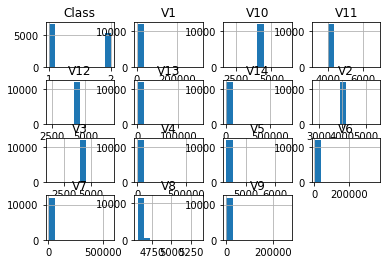

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train_set.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8a956278>,
      dtype=object)

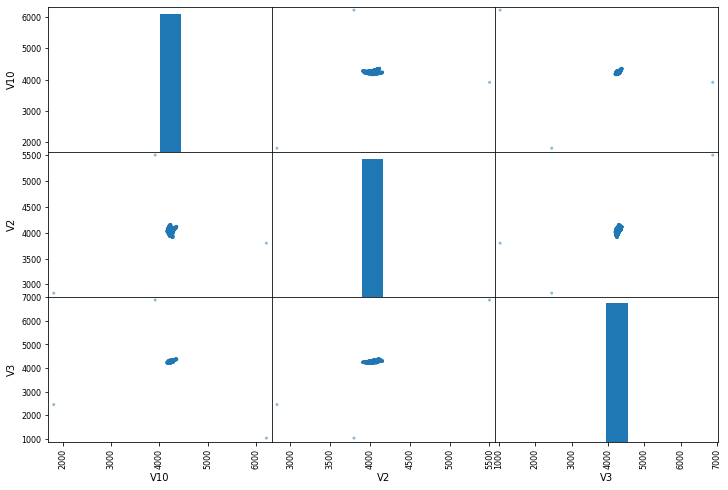

In [35]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
attributes = ["V10", "V2", "V3"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

# 4. Prepare the Data
Notes:    
- Work on copies of the data (keep the original dataset intact).  
- Write functions for all data transformations you apply, for five reasons:  
    - So you can easily prepare the data the next time you get a fresh dataset  
    - So you can apply these transformations in future projects  
    - To clean and prepare the test set  
    - To clean and prepare new data instances  
    - To make it easy to treat your preparation choices as hyperparameters  

1. Data cleaning:  
    - Fix or remove outliers (optional).  
    - Fill in missing values (e.g., with zero, mean, median...) or drop their rows (or columns).  
2. Feature selection (optional):  
    - Drop the attributes that provide no useful information for the task.  
3. Feature engineering, where appropriates:  
    - Discretize continuous features.  
    - Decompose features (e.g., categorical, date/time, etc.).  
    - Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
    - Aggregate features into promising new features.  
4. Feature scaling: standardize or normalize features.  

# 5. Explore Models
Notes: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).  
- Once again, try to automate these steps as much as possible.    

1. Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.  
2. Measure and compare their performance.  
    - For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance. 
3. Analyze the most significant variables for each algorithm.  
4. Analyze the types of errors the models make.  
    - What data would a human have used to avoid these errors?  
5. Have a quick round of feature selection and engineering.  
6. Have one or two more quick iterations of the five previous steps.  
7. Short-list the top three to five most promising models, preferring models that make different types of errors.  

In [39]:
y=train_set.Class
print(y)

2631     2
107      1
10317    1
367      2
9029     2
        ..
5191     1
13418    1
5390     2
860      2
7270     2
Name: Class, Length: 11984, dtype: int64


In [41]:
X = train_set.drop(columns="Class")
print(X)

            V1       V2       V3       V4       V5       V6       V7       V8  \
2631   4210.26  3956.92  4218.97  4098.97  4334.87  4618.46  4083.08  4612.31   
107    4308.21  4002.05  4260.00  4130.26  4345.13  4607.69  4082.05  4626.15   
10317  4289.74  4002.56  4261.54  4123.59  4336.92  4629.23  4060.00  4615.38   
367    4334.87  3986.15  4263.59  4103.59  4333.33  4631.79  4108.21  4631.28   
9029   4217.44  3986.15  4223.59  4083.59  4332.31  4614.87  4066.15  4609.74   
...        ...      ...      ...      ...      ...      ...      ...      ...   
5191   4320.00  4010.77  4258.46  4121.54  4336.41  4620.51  4065.13  4597.95   
13418  4284.62  4021.03  4264.62  4151.79  4350.26  4618.97  4060.00  4607.69   
5390   4330.77  3990.26  4287.18  4121.03  4340.00  4614.87  4089.74  4610.77   
860    4267.69  4025.13  4254.87  4136.41  4343.59  4620.51  4110.26  4606.67   
7270   4277.95  3986.67  4244.62  4109.74  4329.74  4608.72  4054.87  4610.77   

            V9      V10    

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.47392717149528507

In [44]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, predictions)
lin_mae

0.4502689257540642

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [47]:
predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# 6. Fine Tune Models
Notes:  
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.   
- As always automate what you can.    

1. Fine-tune the hyperparameters using cross-validation.  
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or the median value? Or just drop the rows?).  
    - Unless there are very few hyperparamter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using a Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams ([https://goo.gl/PEFfGr](https://goo.gl/PEFfGr)))  
2. Try Ensemble methods. Combining your best models will often perform better than running them invdividually.  
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

> Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.  
  

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.4084185  0.42835294 0.41650678 0.43798005 0.35736935 0.41668058
 0.40241342 0.433374   0.41668058 0.40551293]
Mean: 0.4123289121424514
Standard deviation: 0.021432669823743727


In [50]:
lin_scores = cross_val_score(lin_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [44.05198777  4.24138078  0.47003993  0.47857281  0.47180457  0.48343756
  8.48749687  0.47152107  0.46517377  0.47540826]
Mean: 6.0096823390914444
Standard deviation: 12.926765779469424


In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.12185290657641899

In [53]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.29342247 0.27884846 0.29653265 0.29994439 0.26977701 0.28388845
 0.28605602 0.2848278  0.28216312 0.29566992]
Mean: 0.28711302950769074
Standard deviation: 0.0088118234129887


In [54]:
scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      6.009682
std      13.626008
min       0.465174
25%       0.471592
50%       0.476991
75%       3.301895
max      44.051988
dtype: float64

In [55]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X,y)
predictions = svm_reg.predict(X)
svm_mse = mean_squared_error(y, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

139.85777625490357

In [66]:
from sklearn.svm import SVC

svmc_reg = SVC()
svmc_reg.fit(X,y)
predictions = svmc_reg.predict(X)
svmc_mse = mean_squared_error(y, predictions)
svmc_rmse = np.sqrt(svmc_mse)
svmc_rmse

0.6657759960396115

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier(n_neighbors=3)
knn_reg.fit(X,y)
predictions = knn_reg.predict(X)
knn_mse = mean_squared_error(y, predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.09795982937354743

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 15 (5×3) combinations of hyperparameters
    {'n_neighbors': [3,4,5,6,7], 'algorithm':["ball_tree", "kd_tree", "brute"]}       
  ]

knn_grid_search = GridSearchCV(knn_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
knn_grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 4, 5, 6, 7]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [84]:
knn_grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3}

In [85]:
knn_grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [86]:
cvres = knn_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1878747943931966 {'algorithm': 'ball_tree', 'n_neighbors': 3}
0.2104967080479983 {'algorithm': 'ball_tree', 'n_neighbors': 4}
0.2079044958036596 {'algorithm': 'ball_tree', 'n_neighbors': 5}
0.2245003410228355 {'algorithm': 'ball_tree', 'n_neighbors': 6}
0.220184227079956 {'algorithm': 'ball_tree', 'n_neighbors': 7}
0.1878747943931966 {'algorithm': 'kd_tree', 'n_neighbors': 3}
0.2104967080479983 {'algorithm': 'kd_tree', 'n_neighbors': 4}
0.2079044958036596 {'algorithm': 'kd_tree', 'n_neighbors': 5}
0.2245003410228355 {'algorithm': 'kd_tree', 'n_neighbors': 6}
0.220184227079956 {'algorithm': 'kd_tree', 'n_neighbors': 7}


In [88]:
pd.DataFrame(knn_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011094,0.003859,0.257812,0.007149,ball_tree,3,"{'algorithm': 'ball_tree', 'n_neighbors': 3}",-0.034627,-0.035878,-0.037130,...,-0.035297,0.001134,1,-0.011265,-0.013247,-0.011682,-0.011682,-0.011994,-0.011974,0.000677
1,0.009216,0.000410,0.265168,0.011969,ball_tree,4,"{'algorithm': 'ball_tree', 'n_neighbors': 4}",-0.042553,-0.045056,-0.046308,...,-0.044309,0.001831,7,-0.020549,-0.021279,-0.021487,-0.021592,-0.019921,-0.020965,0.000637
2,0.009540,0.000290,0.274052,0.003707,ball_tree,5,"{'algorithm': 'ball_tree', 'n_neighbors': 5}",-0.041302,-0.045056,-0.047559,...,-0.043224,0.002897,4,-0.022009,-0.020549,-0.019714,-0.020757,-0.019816,-0.020569,0.000825
3,0.009266,0.000341,0.271985,0.004715,ball_tree,6,"{'algorithm': 'ball_tree', 'n_neighbors': 6}",-0.049645,-0.051731,-0.053400,...,-0.050400,0.001888,13,-0.029519,-0.028476,-0.030562,-0.028059,-0.028995,-0.029122,0.000871
4,0.009467,0.000576,0.275611,0.004026,ball_tree,7,"{'algorithm': 'ball_tree', 'n_neighbors': 7}",-0.043805,-0.050480,-0.055069,...,-0.048481,0.003941,10,-0.030562,-0.028267,-0.030458,-0.029102,-0.028056,-0.029289,0.001057
5,0.012573,0.000989,0.115812,0.003781,kd_tree,3,"{'algorithm': 'kd_tree', 'n_neighbors': 3}",-0.034627,-0.035878,-0.037130,...,-0.035297,0.001134,1,-0.011265,-0.013247,-0.011682,-0.011682,-0.011994,-0.011974,0.000677
6,0.012073,0.000354,0.125431,0.006622,kd_tree,4,"{'algorithm': 'kd_tree', 'n_neighbors': 4}",-0.042553,-0.045056,-0.046308,...,-0.044309,0.001831,7,-0.020549,-0.021279,-0.021487,-0.021592,-0.019921,-0.020965,0.000637
7,0.011965,0.000126,0.130879,0.004220,kd_tree,5,"{'algorithm': 'kd_tree', 'n_neighbors': 5}",-0.041302,-0.045056,-0.047559,...,-0.043224,0.002897,4,-0.022009,-0.020549,-0.019714,-0.020757,-0.019816,-0.020569,0.000825
8,0.012151,0.000279,0.139140,0.004573,kd_tree,6,"{'algorithm': 'kd_tree', 'n_neighbors': 6}",-0.049645,-0.051731,-0.053400,...,-0.050400,0.001888,13,-0.029519,-0.028476,-0.030562,-0.028059,-0.028995,-0.029122,0.000871
9,0.012319,0.000372,0.147276,0.004335,kd_tree,7,"{'algorithm': 'kd_tree', 'n_neighbors': 7}",-0.043805,-0.050480,-0.055069,...,-0.048481,0.003941,10,-0.030562,-0.028267,-0.030458,-0.029102,-0.028056,-0.029289,0.001057


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [57]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [60]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.36080856939673256 {'max_features': 2, 'n_estimators': 3}
0.3083845893518983 {'max_features': 2, 'n_estimators': 10}
0.29247544850991036 {'max_features': 2, 'n_estimators': 30}
0.3471496014863094 {'max_features': 4, 'n_estimators': 3}
0.2942086046317213 {'max_features': 4, 'n_estimators': 10}
0.2788557135960152 {'max_features': 4, 'n_estimators': 30}
0.3463335578537414 {'max_features': 6, 'n_estimators': 3}
0.29282281879465377 {'max_features': 6, 'n_estimators': 10}
0.2767333829377463 {'max_features': 6, 'n_estimators': 30}
0.33794682137302 {'max_features': 8, 'n_estimators': 3}
0.29472890845329214 {'max_features': 8, 'n_estimators': 10}
0.2775382690230212 {'max_features': 8, 'n_estimators': 30}
0.3448988372739644 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.28975457650036973 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3334718565197326 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.28088731315325133 {'bootstrap': False, 'max_features': 3

In [61]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028918,0.004384,0.001632,0.000187,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.128448,-0.129097,...,-0.130183,0.002184,18,-0.034201,-0.035291,-0.035488,-0.035302,-0.034430,-0.034942,0.000522
1,0.083434,0.000992,0.003273,0.000143,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.094172,-0.095615,...,-0.095101,0.001805,11,-0.017997,-0.017724,-0.018029,-0.018037,-0.018017,-0.017961,0.000119
2,0.250750,0.004017,0.008346,0.000201,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.084863,-0.087803,...,-0.085542,0.001313,7,-0.013169,-0.013177,-0.013261,-0.013214,-0.013113,-0.013187,0.000049
3,0.042830,0.000545,0.001569,0.000078,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.122282,-0.120614,...,-0.120513,0.002697,17,-0.032845,-0.030632,-0.030898,-0.032150,-0.034291,-0.032163,0.001337
4,0.139974,0.003592,0.003350,0.000249,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.087288,-0.091051,...,-0.086559,0.003005,9,-0.016783,-0.016526,-0.015992,-0.016650,-0.016750,-0.016540,0.000288
5,0.423893,0.004415,0.007929,0.000255,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.077784,-0.082041,...,-0.077761,0.002467,4,-0.012022,-0.011883,-0.011647,-0.012316,-0.012127,-0.011999,0.000226
6,0.060015,0.000984,0.001477,0.000027,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.122004,-0.129606,...,-0.119947,0.005694,16,-0.030713,-0.031200,-0.030551,-0.029508,-0.032784,-0.030951,0.001070
7,0.193125,0.001681,0.003087,0.000078,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.086433,-0.091773,...,-0.085745,0.003558,8,-0.016107,-0.016125,-0.015901,-0.015774,-0.016254,-0.016032,0.000171
8,0.578959,0.005888,0.007626,0.000179,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.076058,-0.082098,...,-0.076581,0.002950,1,-0.011811,-0.011882,-0.011840,-0.011714,-0.011780,-0.011805,0.000057
9,0.077204,0.001405,0.001541,0.000103,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.116303,-0.119084,...,-0.114208,0.004745,14,-0.031744,-0.029079,-0.030875,-0.030110,-0.031799,-0.030721,0.001030


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [63]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.26857561305381306 {'max_features': 7, 'n_estimators': 180}
0.2854897150164131 {'max_features': 5, 'n_estimators': 15}
0.2777437177056502 {'max_features': 3, 'n_estimators': 72}
0.28062001884057536 {'max_features': 5, 'n_estimators': 21}
0.26904657823896627 {'max_features': 7, 'n_estimators': 122}
0.2778523485922044 {'max_features': 3, 'n_estimators': 75}
0.27723473507242946 {'max_features': 3, 'n_estimators': 88}
0.27105847996154275 {'max_features': 5, 'n_estimators': 100}
0.2762857673511324 {'max_features': 3, 'n_estimators': 150}
0.37818492044191454 {'max_features': 5, 'n_estimators': 2}


In [64]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07610476, 0.09300435, 0.05268591, 0.05804585, 0.05177924,
       0.11296761, 0.12336569, 0.0576925 , 0.03801245, 0.05363324,
       0.05597064, 0.06124968, 0.08618211, 0.07930597])

In [65]:
sorted(zip(feature_importances, list(data.columns) ), reverse=True)

[(0.12336568959196602, 'V7'),
 (0.11296761034415888, 'V6'),
 (0.09300434577388984, 'V2'),
 (0.08618211474742397, 'V13'),
 (0.07930596979622853, 'V14'),
 (0.07610476127163278, 'V1'),
 (0.061249676331755425, 'V12'),
 (0.05804584669680661, 'V4'),
 (0.057692496964609485, 'V8'),
 (0.055970640815121576, 'V11'),
 (0.05363324466323962, 'V10'),
 (0.05268590753344825, 'V3'),
 (0.051779242822978626, 'V5'),
 (0.03801245264674041, 'V9')]

# 7. Present Solution
1. Document what you have done.  
2. Create a nice presentation.  
    - Make sure you highlight the big picture first.  
3. Explain why your solution achieves the business objective.  
4. Don't forget to present interesting points you noticed along the way.  
    - Describe what worked and what did not.  
    - List your assumptions and your system's limitations.  
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., "the median income is the number-one predictor of housing prices").  

# 8. Launch and Monitor
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).  
2. Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.  
    - Beware of slow degradation too: models tend to "rot" as data evolves.   
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).  
    - Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is  particulary important for online learning systems.  
3. Retrain your models on a regular basis on fresh data (automate as much as possible).  
